In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# **3.2 Task #1: Unsupervised learning, PCA of NIR data**
A. Generate the plot of all the training set raw NIR data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_excel('sawdust_train.xlsx')
train

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35
5,10,08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,...,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067,0.00,66.65,33.35
6,11,13a,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,...,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057,16.66,16.66,66.67
7,12,13b,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,...,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234,16.66,16.66,66.67
8,17,11a,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,...,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966,66.67,16.66,16.66
9,18,11b,1.80260,1.80223,1.80160,1.80067,1.79940,1.79788,1.79646,1.79531,...,0.544048,0.549074,0.553642,0.558111,0.562464,0.566793,0.570855,66.67,16.66,16.66


In [ ]:
train1 = train.drop(['Primary ID'], axis = 1)
train1.set_index("OBSNAM", inplace=True)

In [ ]:
train_y = train1.iloc[:,-3:]
train_y

,Spruce,Pine,Birch
OBSNAM,,,
02a,0.00,100.00,0.00
02b,0.00,100.00,0.00
15a,33.33,33.33,33.33
15b,33.33,33.33,33.33
08a,0.00,66.65,33.35
08b,0.00,66.65,33.35
13a,16.66,16.66,66.67
13b,16.66,16.66,66.67
11a,66.67,16.66,16.66


In [ ]:
train_x = train1.iloc[:,:-3]
train_x

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
OBSNAM,,,,,,,,,,,,,,,,,,,,,
02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,...,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,...,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,...,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,...,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,...,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635
08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,...,0.547361,0.552224,0.557200,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067
13a,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,1.77113,1.77084,...,0.537287,0.543007,0.548699,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057
13b,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,1.77433,1.77397,...,0.539009,0.543364,0.547846,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234
11a,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,1.80026,1.79969,...,0.528280,0.533482,0.538662,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966


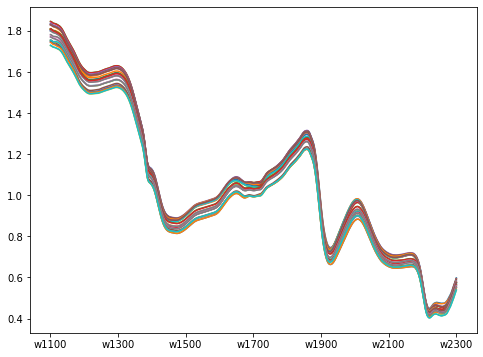

In [ ]:
train_x.transpose().plot(legend = None,figsize=(8,6))

B. Pre-process the NIR data and perform PCA for 5 components.

In [ ]:
scaler = StandardScaler(with_std=False)
x_scaled = scaler.fit_transform(train_x)

In [ ]:
pca5 = PCA(n_components=5, svd_solver='full')
pca_scores = pca5.fit_transform(x_scaled)

In [ ]:
scores_pd = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = train_x.index)
loadings_pd = pd.DataFrame(data = pca5.components_.T, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = train_x.columns)

C. Plot the cumulative explained variance versus the number of components. How many
components do we need to capture 99% of the variance?

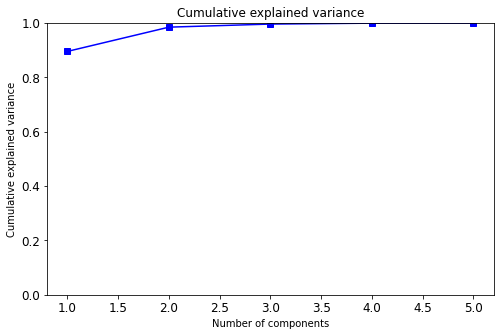

In [ ]:
fig = plt.figure(figsize=(8,5))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca5.n_components+1), np.cumsum(pca5.explained_variance_ratio_),'b-s')
plt.tick_params(labelsize=12)
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.ylim(0,1)
plt.show()


In [ ]:
i = 0
while sum(pca5.explained_variance_ratio_[:i]) < 0.99:
  i += 1
print(i)

3


We need 3 components to capture 99% of the variance.

D. Plot the PCA scores for the first two components. Comment on any outliers, trends,
clusters etc (if any).

In [ ]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

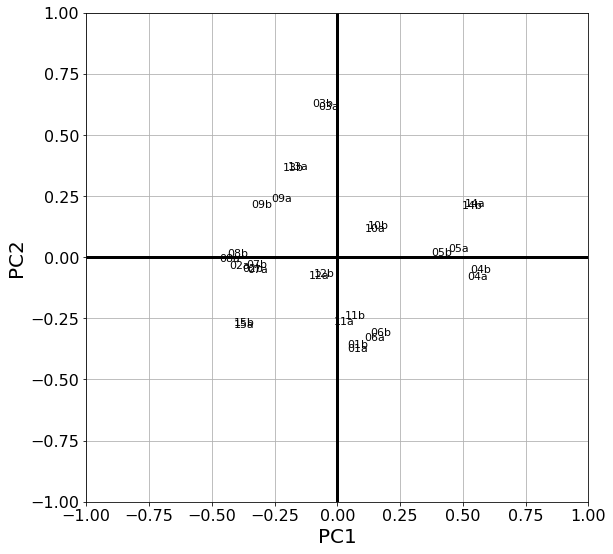

In [ ]:
score_plot(pca_scores[:,:2], score_labels=scores_pd.index)
plt.show()

First of all, there is one obvious cluster formed by 02,08,07. And other point are clost together. Only one data is far from other data which is 03, therefore I may conclude that 03 is the outliers.

E. Plot the loadings of the first two components and comment on which wavelengths
seem to be important for different PCs. Don’t describe the graphs in words. In two
sentences, describe any significant trends or signals (if any)

In [ ]:
from matplotlib.ticker import MaxNLocator

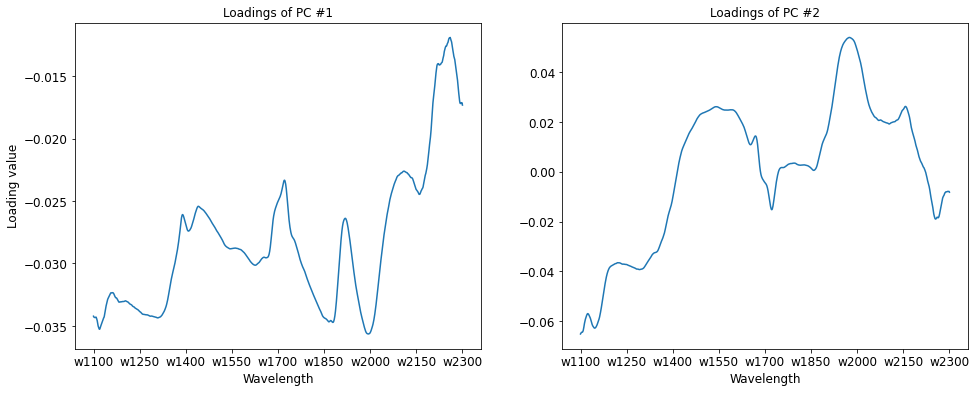

In [ ]:
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_pd['PC1'],'-')
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Loading value', fontsize=12)
plt.title('Loadings of PC #1', fontsize=12)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=12)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_pd['PC2'],'-')
plt.xlabel('Wavelength', fontsize=12)
plt.title('Loadings of PC #2', fontsize=12)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=12)

plt.show()


For PCA1 the wavelength around 1100nm and 2000nm seems important. And for PCA2 only the wavelength arounf 1100nm seems important. 

For all wavelength in PCA1 they take a negative effect, and some wavelength in PCA2 take a positive effect(eg around 2000).

F. Apply the dimensionality reduction with the PCA model you developed in step B for
the test set using the transform method.

In [29]:
test = pd.read_excel('sawdust_pred.xlsx')
test = test.drop(['Primary ID'], axis = 1)
test.set_index("OBSNAM", inplace=True)

In [30]:
test_y = test.iloc[:,-3:]
test_x = test.iloc[:,:-3]

In [31]:
testx_scaled = scaler.transform(test_x)
pca_scores1 = pca5.transform(testx_scaled)

scores_pd1 = pd.DataFrame(data = pca_scores1, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = test_x.index)

G. Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test
data set, coloured by the set they belong to (suggestion: use sns.scatterplot). Why is
it important to overlap the scores of both train and test set in one graph? What are
you checking to see?

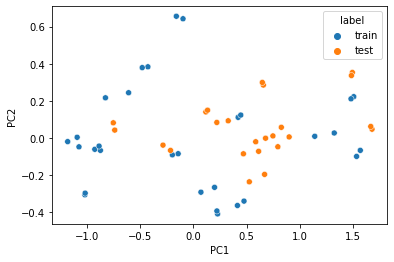

In [33]:
scores_pd['label'] = 'train'
scores_pd1['label'] = 'test'
df_score = pd.concat([scores_pd, scores_pd1],axis = 0)
sns.scatterplot(data=df_score, x="PC1", y="PC2", hue="label")

Since it can show the split situation of train and test and let us to see whether the data seperation is balance or not.

# **3.3 Task #2: Supervised learning, PLS model**
A. Run the PLS regression to model all 3 outputs with the scaled train set spectra.
Increase the number of components to achieve R2 value of at least 0.92 (use PLSRegression’s method score to estimate R2
).

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [36]:
pls_sklearn = PLSRegression(n_components=3, scale=False)
pls_sklearn.fit(x_scaled, train_y)

PLSRegression(n_components=3, scale=False)

B. Predict the output values for the inputs in the test set and compare them by plotting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch,
respectively). Also, include the y=x line for reference.

In [37]:
y_pred = pls_sklearn.predict(testx_scaled)

(0.0, 100.0)

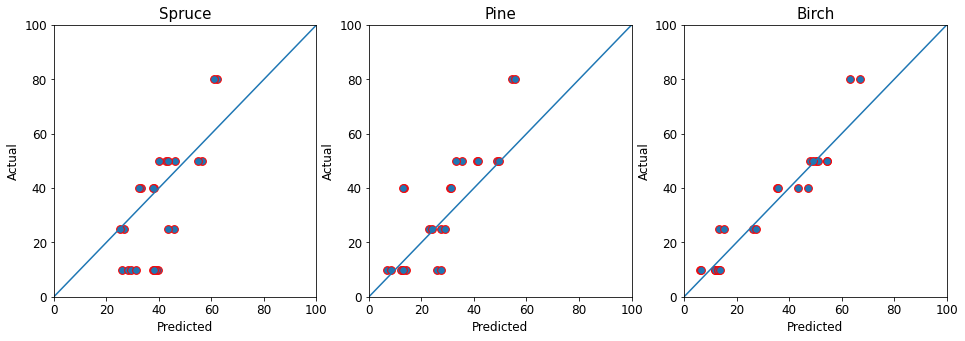

In [42]:
fig1 = plt.figure(figsize=(16, 5))
sub1 = fig1.add_subplot(131)
plt.scatter(y_pred[:,0], test_y['Spruce'], s=60, marker="o", edgecolors='r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Spruce', fontsize = 15)
plt.tick_params(labelsize=12)
plt.xlim([0, 100])
plt.ylim([0, 100])

sub2 = fig1.add_subplot(132)
plt.scatter(y_pred[:,1], test_y['Pine'], s=60, marker="o", edgecolors='r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Pine', fontsize = 15)
plt.tick_params(labelsize=12)
plt.xlim([0, 100])
plt.ylim([0, 100])

sub3 = fig1.add_subplot(133)
plt.scatter(y_pred[:,2], test_y['Birch'], s=60, marker="o", edgecolors='r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Birch', fontsize = 15)
plt.tick_params(labelsize=12)
plt.xlim([0, 100])
plt.ylim([0, 100])
